In [1]:
import numpy as np
from braket.circuits import Circuit
from scipy.linalg import expm
import pandas as pd

In [2]:
from braket.devices import LocalSimulator
device = LocalSimulator()

### K Means Clustering

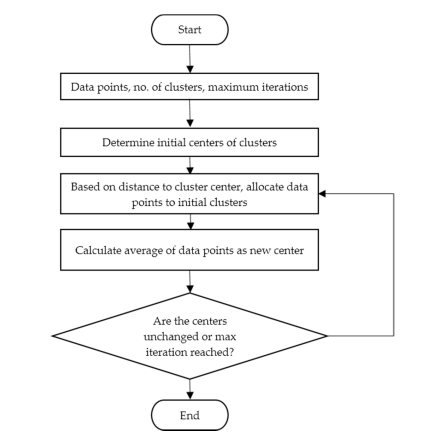

### Relation Between Distance and Inner Product

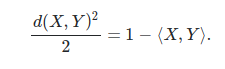

### SWAP Test

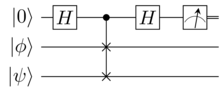

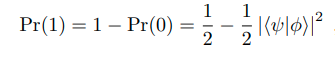

### Angle Embedding

$a'$ = $(a_1', a_2',a_3', a_4')$

$b'$ = $(b_1', b_2',b_3', b_4')$

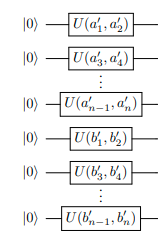

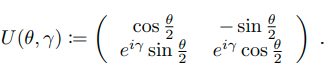

#### Final Circuit

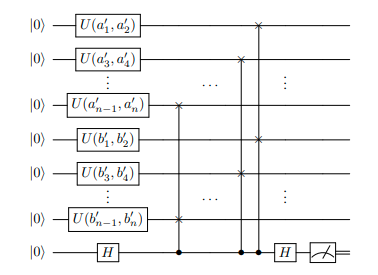

In [38]:
def get_unitary(theta, gamma):
    uni = [[np.cos(theta/2),-np.sin(theta/2)],
           [np.exp(1j*gamma)*np.sin(theta/2), np.exp(1j*gamma)*np.cos(theta/2)]]
    
    return np.array(uni)

def get_quantum_dist(a, b):
    N = len(a)
    
    a_dash = []
    b_dash = []

    for i in range(N):
        a_dash.append((np.pi/2)*(a[i] + 1))
        b_dash.append((np.pi/2)*(b[i] + 1))
    
    circuit = Circuit()

    for n in range(int(N/2)):
        uni = get_unitary(a_dash[2*n],a_dash[2*n + 1])
        circuit.unitary(matrix=uni, targets=[circuit.qubit_count])
    for n in range(int(N/2)):
        uni = get_unitary(b_dash[2*n],b_dash[2*n + 1])
        circuit.unitary(matrix=uni, targets=[circuit.qubit_count])
        
    
    circuit.h(circuit.qubit_count)
    
    
    for i in range(int(N/2)):
        circuit.cswap(circuit.qubit_count-1, int(N/2)+i, i)

    
    circuit.h(circuit.qubit_count-1)
    
    
    circuit.probability(target=(circuit.qubit_count-1))
    print(circuit)
    task = device.run(circuit, shots=1000)
    result = task.result()
    
    Z = np.linalg.norm(a)**2 + np.linalg.norm(b)**2
    d = np.sqrt(Z*result.values[0][1])
    
    return d

In [39]:
dataset = pd.read_csv("Iris.csv",  sep=",")
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
data = np.array(dataset.values[:, 0:4])
data = data.astype(float)
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [40]:
def get_data_point(example):
    x = dataset.iloc[example, [0, 1, 2, 3]].values
    return x

In [55]:
a = get_data_point(0)
b = get_data_point(1)

In [57]:
a

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [56]:
d = get_quantum_dist(a, b)

T  : |0| 1  | 2  |3|Result Types|
                                 
q0 : -U-SWAP---------------------
        |                        
q1 : -U-|----SWAP----------------
        |    |                   
q2 : -U-SWAP-|-------------------
        |    |                   
q3 : -U-|----SWAP----------------
        |    |                   
q4 : -H-C----C----H-Probability--

T  : |0| 1  | 2  |3|Result Types|


In [58]:
d

0.9891966437468336

In [30]:
# Number of clusters
k = 3
# Number of training data
M = data.shape[0]
print(M)
# Number of features in the data
N = data.shape[1]
print(N)

150
4


In [31]:
# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
print(mean)
std = np.std(data, axis = 0)
print(std)
initial_centers = np.random.randn(k,N)*std + mean

[5.84333333 3.054      3.75866667 1.19866667]
[0.82530129 0.43214658 1.75852918 0.76061262]


In [32]:
initial_centers

array([[6.85436567, 3.24383053, 6.03319946, 1.68256595],
       [5.1749928 , 2.78969909, 6.42239764, 2.15328538],
       [7.76415243, 2.85303892, 6.22691487, 2.18070217]])

In [45]:
initial_distance_from_centroids = []
for m in range(M):
    distance_from_centroid_k = []
    for k in initial_centers:
        a = get_data_point(m)
        d = get_quantum_dist(a,k)
        distance_from_centroid_k.append(d)
    initial_distance_from_centroids.append(distance_from_centroid_k)
#initial_distance_from_centroids

T  : |0| 1  | 2  |3|Result Types|
                                 
q0 : -U-SWAP---------------------
        |                        
q1 : -U-|----SWAP----------------
        |    |                   
q2 : -U-SWAP-|-------------------
        |    |                   
q3 : -U-|----SWAP----------------
        |    |                   
q4 : -H-C----C----H-Probability--

T  : |0| 1  | 2  |3|Result Types|
T  : |0| 1  | 2  |3|Result Types|
                                 
q0 : -U-SWAP---------------------
        |                        
q1 : -U-|----SWAP----------------
        |    |                   
q2 : -U-SWAP-|-------------------
        |    |                   
q3 : -U-|----SWAP----------------
        |    |                   
q4 : -H-C----C----H-Probability--

T  : |0| 1  | 2  |3|Result Types|
T  : |0| 1  | 2  |3|Result Types|
                                 
q0 : -U-SWAP---------------------
        |                        
q1 : -U-|----SWAP----------------
        |   

In [47]:
np.array(initial_distance_from_centroids).shape

(150, 3)

In [11]:
def get_euclidean_dist(a,b):
    dist = 0
    for i in range(2):
        dist += (a[i] - b[i])**2
    return np.sqrt(dist)

In [12]:
cluster_0 = []
cluster_1 = []
cluster_2 = []

distmatrix_0 = []
distmatrix_1 = []
distmatrix_2 = []

last_centers = initial_centers
convergence = None

distance_from_centroids = initial_distance_from_centroids
for ir in range(100):
    for m in range(M):
        k = np.argmin(distance_from_centroids[m])
        if k ==0:
            cluster_0.append(m)
            distmatrix_0.append(get_data_point(m))
            new_center_0  = np.array(distmatrix_0).astype(float).mean(axis=0)
        if k ==1:
            cluster_1.append(m)
            distmatrix_1.append(get_data_point(m))
            new_center_1  = np.array(distmatrix_1).astype(float).mean(axis=0)
        if k ==2:
            cluster_2.append(m)
            distmatrix_2.append(get_data_point(m))
            new_center_2  = np.array(distmatrix_2).astype(float).mean(axis=0)
            
            
    last_centers[0] = new_center_0
    last_centers[1] = new_center_1
    last_centers[2] = new_center_2
    
    
    distance_from_centroids = []
    for m in range(M):
        distance_from_centroid_k = []
        for k in last_centers:
            a = get_data_point(m)
            d = get_quantum_dist(a,k)
            distance_from_centroid_k.append(d)
        distance_from_centroids.append(distance_from_centroid_k)
    print(np.array(distance_from_centroids).shape)
    print("-----------------------------------------------------------------------------------------------------")

Distances: [0.670413206132898, 0.4103111077235218, 0.9398440599852096]
False
(150, 3)
-----------------------------------------------------------------------------------------------------
Distances: [0.04341533415236982, 0.03685865014759582, 0.06153847078686886]
True
(150, 3)
-----------------------------------------------------------------------------------------------------
Distances: [0.014953126747083378, 0.015988672652423114, 0.01440818635533839]
True
(150, 3)
-----------------------------------------------------------------------------------------------------
Distances: [0.008055268455371117, 0.005207702881032046, 0.018953881511967998]
True
(150, 3)
-----------------------------------------------------------------------------------------------------
Distances: [0.0026815596454166433, 0.0031246217286197424, 0.007278974823590663]
True
(150, 3)
-----------------------------------------------------------------------------------------------------
Distances: [0.0018629502300901387, 0.0

In [13]:
labels = np.ones(shape = (1, 150))
for c in range(len([cluster_0, cluster_1, cluster_2])):
    for m in [cluster_0, cluster_1, cluster_2][c]:
        labels[0][m] = c

In [50]:
x = dataset.iloc[:, :-1].values #last column values excluded
y = dataset.iloc[:,   -1].values #last column value

In [51]:
new_centers = np.array([list(new_center_0), list(new_center_1), list(new_center_2)])
new_centers 

array([[5.1271012 , 3.29797599, 1.90679245, 0.4225729 ],
       [5.95786268, 2.77768549, 4.46607604, 1.4610742 ],
       [6.79085821, 3.07390725, 5.61465885, 2.02566631]])

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6daaf67f70>
Traceback (most recent call last):
  File "/home/qulabs-sangru/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/qulabs-sangru/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/qulabs-sangru/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/qulabs-sangru/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_

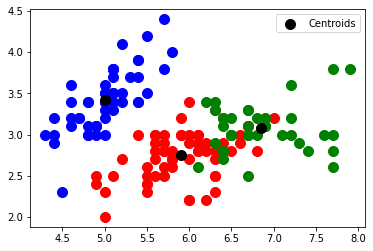

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
iris_data=load_iris()   #loading iris dataset from sklearn.datasets
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names) #creating dataframe
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans classifier
y_kmeans = kmeans.fit_predict(x)
#print(kmeans.cluster_centers_) #display cluster centers
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green')   #Visualising the clusters - On the first two columns
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()

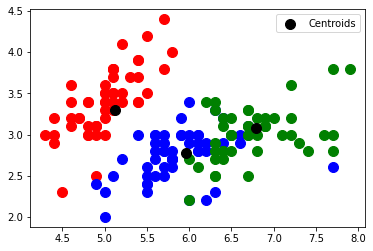

In [53]:
plt.scatter(x[labels[0]   == 0, 0], x[labels[0] == 0, 1],s = 100, c = 'red')
plt.scatter(x[labels[0]   == 1, 0], x[labels[0] == 1, 1],s = 100, c = 'blue')
plt.scatter(x[labels[0]   == 2, 0], x[labels[0] == 2, 1],s = 100, c = 'green')   #Visualising the clusters - On the first two columns
plt.scatter(new_centers[:,   0], new_centers[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()